# CST 383: Predicting Water Suface Elevation in Ground Water



## Preliminary work on data preparation

In [45]:
# imported required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [46]:
# set default figure size
plt.rcParams['figure.figsize'] = [8.0, 6.0]

In [82]:
# code in this cell from: 
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to display/hide the code."></form>''')

### Reading the Data

In [48]:
data = "https://data.cnra.ca.gov/dataset/618c73fe-b28c-4399-a824-43d0278fe974/resource/16f256f8-35a4-4cab-ae02-399a2914c282/download/gwl-monthly.csv"
df = pd.read_csv(data)

In [49]:
stations = pd.read_csv("https://data.cnra.ca.gov/dataset/618c73fe-b28c-4399-a824-43d0278fe974/resource/03967113-1556-4100-af2c-b16a4d41b9d0/download/gwl-stations.csv")
quality_codes = pd.read_csv("https://data.cnra.ca.gov/dataset/618c73fe-b28c-4399-a824-43d0278fe974/resource/06437a09-ac72-4d5b-91a7-e5963349b486/download/gwl-quality_codes.csv")

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81764 entries, 0 to 81763
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STATION     81764 non-null  object 
 1   MSMT_DATE   81764 non-null  object 
 2   WLM_RPE     81534 non-null  float64
 3   WLM_RPE_QC  81764 non-null  int64  
 4   WLM_GSE     81191 non-null  float64
 5   WLM_GSE_QC  81764 non-null  int64  
 6   RPE_WSE     66399 non-null  float64
 7   RPE_WSE_QC  81764 non-null  int64  
 8   GSE_WSE     65884 non-null  float64
 9   GSE_WSE_QC  81764 non-null  int64  
 10  WSE         66183 non-null  float64
 11  WSE_QC      81764 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 7.5+ MB


In [51]:
df.describe()

,WLM_RPE,WLM_RPE_QC,WLM_GSE,WLM_GSE_QC,RPE_WSE,RPE_WSE_QC,GSE_WSE,GSE_WSE_QC,WSE,WSE_QC
count,81534.00000,81764.000000,81191.000000,81764.000000,66399.000000,81764.000000,65884.000000,81764.000000,66183.000000,81764.000000
mean,340.04853,9.166357,339.019729,9.420405,36.407878,47.971687,34.638727,55.309439,300.674951,54.736547
std,970.08112,27.466726,971.953454,28.743207,33.688272,96.876386,33.829700,97.045280,981.511909,96.938959
min,-0.57000,1.000000,-3.170000,1.000000,-11.949000,1.000000,-14.749000,1.000000,-165.659000,1.000000
25%,45.01000,1.000000,44.580000,1.000000,12.893000,1.000000,11.359250,1.000000,20.449500,1.000000
50%,132.45000,1.000000,129.300000,1.000000,25.993000,1.000000,24.202000,1.000000,94.775000,1.000000
75%,208.22000,1.000000,207.430000,1.000000,49.389000,1.000000,47.762000,70.000000,147.962500,70.000000
max,5495.26000,255.000000,5492.010000,255.000000,316.157000,255.000000,314.037000,255.000000,5491.840000,255.000000


### Missing Data

In [52]:
# print the number of null values in each column of the DataFrame 'df'
print(df.isnull().sum())

STATION           0
MSMT_DATE         0
WLM_RPE         230
WLM_RPE_QC        0
WLM_GSE         573
WLM_GSE_QC        0
RPE_WSE       15365
RPE_WSE_QC        0
GSE_WSE       15880
GSE_WSE_QC        0
WSE           15581
WSE_QC            0
dtype: int64


In [53]:
# filter the DataFrame 'df' to show only the rows where the 'RPE_WSE', 'GSE_WSE' and 'WSE' columns are null
df[df.RPE_WSE.isnull() & df.GSE_WSE.isnull() & df.WSE.isnull()].head()

,STATION,MSMT_DATE,WLM_RPE,WLM_RPE_QC,WLM_GSE,WLM_GSE_QC,RPE_WSE,RPE_WSE_QC,GSE_WSE,GSE_WSE_QC,WSE,WSE_QC
0,01N04E36Q001M,2005-04-01,9.1,1,6.9,1,NaN,255,NaN,255,NaN,255
37,01N04E36Q001M,2008-05-01,9.1,1,6.9,1,NaN,255,NaN,255,NaN,255
38,01N04E36Q001M,2008-06-01,9.1,1,6.9,1,NaN,255,NaN,255,NaN,255
39,01N04E36Q001M,2008-07-01,9.1,1,6.9,1,NaN,255,NaN,255,NaN,255
40,01N04E36Q001M,2008-08-01,9.1,1,6.9,1,NaN,255,NaN,255,NaN,255


We can drop the na values for now? Its a fraction of the data.

In [54]:
# show total rows before cleaning null values
print("Total rows with NA values: ",len(df))

Total rows with NA values:  81764


In [55]:
df = df.dropna()
print("Total clean rows: ", len(df))

Total clean rows:  65884


In [56]:
# check for null values
print(df.isnull().sum())

STATION       0
MSMT_DATE     0
WLM_RPE       0
WLM_RPE_QC    0
WLM_GSE       0
WLM_GSE_QC    0
RPE_WSE       0
RPE_WSE_QC    0
GSE_WSE       0
GSE_WSE_QC    0
WSE           0
WSE_QC        0
dtype: int64


### Station Info

In [57]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STATION      567 non-null    object 
 1   SITE_CODE    556 non-null    object 
 2   STNAME       567 non-null    object 
 3   WELL_NAME    567 non-null    object 
 4   LATITUDE     567 non-null    float64
 5   LONGITUDE    567 non-null    float64
 6   LLDATUM      567 non-null    object 
 7   POSACC       567 non-null    object 
 8   ELEV         567 non-null    float64
 9   ELEVDATUM    103 non-null    object 
 10  ELEVACC      567 non-null    object 
 11  COUNTY_NAME  567 non-null    object 
 12  BASIN_CODE   536 non-null    object 
 13  BASIN_NAME   536 non-null    object 
 14  WELL_DEPTH   523 non-null    float64
 15  WELL_USE     526 non-null    object 
 16  WELL_TYPE    536 non-null    object 
 17  WCR_NO       398 non-null    object 
 18  WDL          567 non-null    object 
 19  COMMENT 

### Quality Control Info

In [58]:
quality_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   QUALITY_CODE  46 non-null     int64 
 1   DESCRIPTION   46 non-null     object
dtypes: int64(1), object(1)
memory usage: 864.0+ bytes


## Preliminary work on data exploration and visualization

### Helper Functions to filter by date

In [59]:

def get_mst_by_year(df, year):
    return df[df['MSMT_DATE'].str.startswith(year)]

def get_mst_by_month(df, month):
    return df[df['MSMT_DATE'].str[5:].str.startswith(month)]

def get_mst_by_month_year(df, month, year):
    return df[df['MSMT_DATE'].str.startswith(year + '-' + month)]


### Highest water level recorded in 2005

In [60]:
y2005 = get_mst_by_year(df, '2005')
y2005.max()

STATION       48N05E26D001M
MSMT_DATE        2005-12-01
WLM_RPE             5495.26
WLM_RPE_QC               70
WLM_GSE             5492.01
WLM_GSE_QC               70
RPE_WSE             203.254
RPE_WSE_QC               70
GSE_WSE             201.284
GSE_WSE_QC               70
WSE                5489.487
WSE_QC                   70
dtype: object

### Highest Recorded Water Level in December

In [61]:
dec = get_mst_by_month(df, '12')
dec.max()

STATION       48N05E36A002M
MSMT_DATE        2022-12-01
WLM_RPE             5495.26
WLM_RPE_QC              130
WLM_GSE             5492.01
WLM_GSE_QC              130
RPE_WSE             249.449
RPE_WSE_QC              120
GSE_WSE             246.829
GSE_WSE_QC              130
WSE                5491.607
WSE_QC                  130
dtype: object

### Max Level in December 2005

In [62]:
dec_2005 = get_mst_by_month_year(df, '12', '2005')
dec_2005.max()

STATION       48N05E26D001M
MSMT_DATE        2005-12-01
WLM_RPE             5495.26
WLM_RPE_QC               70
WLM_GSE             5492.01
WLM_GSE_QC               70
RPE_WSE             149.485
RPE_WSE_QC               10
GSE_WSE             147.985
GSE_WSE_QC               70
WSE                5489.487
WSE_QC                   70
dtype: object

## Water level of station 48N05E26D001M over 2005

In [63]:
get_mst_by_year(df[df['STATION'] == '48N05E26D001M'], '2005')[['MSMT_DATE', 'WSE', 'WSE_QC']]

,MSMT_DATE,WSE,WSE_QC
81695,2005-01-01,4011.179,1
81696,2005-02-01,4011.453,1
81697,2005-03-01,4011.560,1
81698,2005-04-01,4011.785,1
81699,2005-05-01,4012.024,1
81700,2005-06-01,3989.853,1
81701,2005-07-01,4011.226,1
81702,2005-08-01,4011.034,1
81703,2005-09-01,4010.845,1
81704,2005-10-01,4010.657,1


## View Number of yearly measurements per station.

In [64]:
get_mst_by_month(df, '01')[['STATION', 'MSMT_DATE', 'WSE', 'WSE_QC']].value_counts('STATION').head(10)


STATION
21N02E26E005M    52
11N04E04N004M    29
09N03E08C001M    29
09N03E08C003M    29
11N04E04N003M    28
11N04E04N002M    28
09N03E08C002M    27
11N01E24Q005M    27
09N03E08C004M    27
11N01E24Q007M    25
dtype: int64

## View Station 21N02E26E005M

             STATION   MSMT_DATE  WLM_RPE  WLM_RPE_QC  WLM_GSE  WLM_GSE_QC  \
47213  21N02E26E005M  1970-01-01   184.44          10   182.26          10   
47225  21N02E26E005M  1971-01-01   184.44          10   182.26          10   
47237  21N02E26E005M  1972-01-01   184.44          10   182.26          10   
47249  21N02E26E005M  1973-01-01   184.44          10   182.26          10   
47261  21N02E26E005M  1974-01-01   184.44          10   182.26          10   
47273  21N02E26E005M  1975-01-01   184.44          10   182.26          10   
47285  21N02E26E005M  1976-01-01   184.44          10   182.26          10   
47297  21N02E26E005M  1977-01-01   184.44          10   182.26          10   
47309  21N02E26E005M  1978-01-01   184.44          10   182.26          10   
47321  21N02E26E005M  1979-01-01   184.44          10   182.26          10   
47333  21N02E26E005M  1980-01-01   184.44          10   182.26          10   
47345  21N02E26E005M  1981-01-01   184.44          10   182.26  

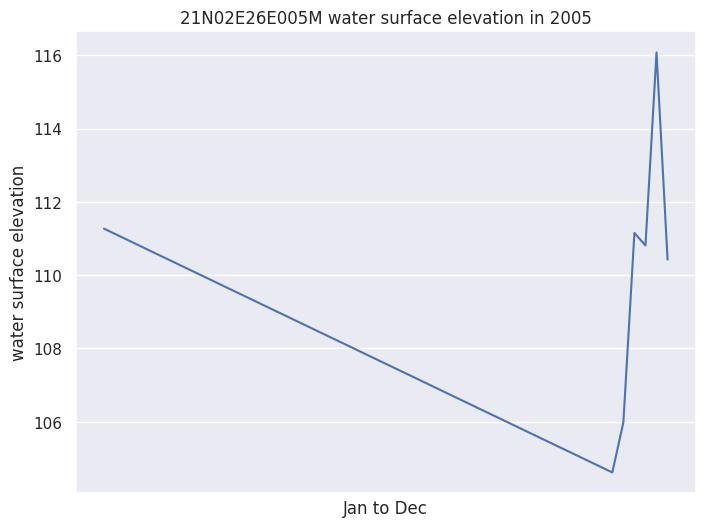

In [65]:
historic_station_levels = get_mst_by_month(df[df['STATION'] == '21N02E26E005M'], '01')
print(historic_station_levels)
plt.xticks([])
plt.title('21N02E26E005M water surface elevation in 2005')
plt.ylabel('water surface elevation')
plt.xlabel('Jan to Dec')
plt.plot(get_mst_by_month(df[df['STATION'] == '21N02E26E005M'], '01')['MSMT_DATE'], get_mst_by_month(df[df['STATION'] == '21N02E26E005M'], '01')['WSE'])
plt.show()

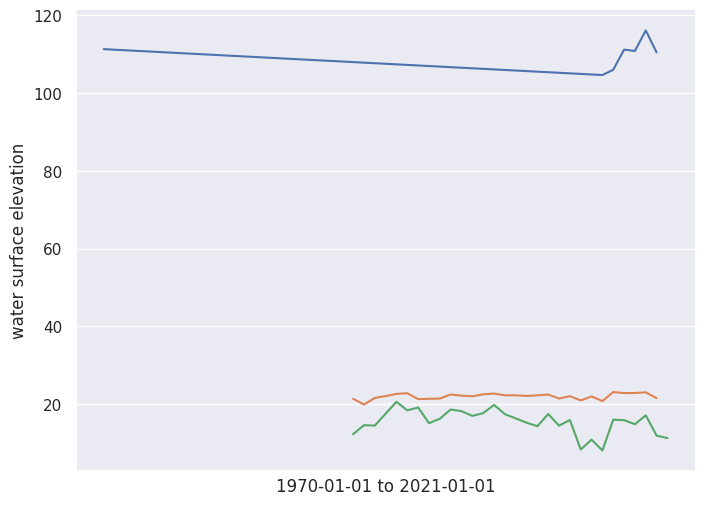

In [66]:
plt.xticks([])
plt.ylabel('water surface elevation')
plt.plot(get_mst_by_month(df[df['STATION'] == '21N02E26E005M'], '01')['MSMT_DATE'], get_mst_by_month(df[df['STATION'] == '21N02E26E005M'], '01')['WSE'])
plt.plot(get_mst_by_month(df[df['STATION'] == '09N03E08C001M'], '01')['MSMT_DATE'], get_mst_by_month(df[df['STATION'] == '09N03E08C001M'], '01')['WSE'])
plt.plot(get_mst_by_month(df[df['STATION'] == '09N03E08C003M'], '01')['MSMT_DATE'], get_mst_by_month(df[df['STATION'] == '09N03E08C003M'], '01')['WSE'])
plt.xlabel(get_mst_by_month(df[df['STATION'] == '21N02E26E005M'], '01')['MSMT_DATE'].iloc[0] + ' to ' + get_mst_by_month(df[df['STATION'] == '21N02E26E005M'], '01')['MSMT_DATE'].iloc[-1])
plt.show()

## Graping the water Levels 

View Water Levels over the lifetime of measurements. Only looking at places that have 28+ years of measurements.

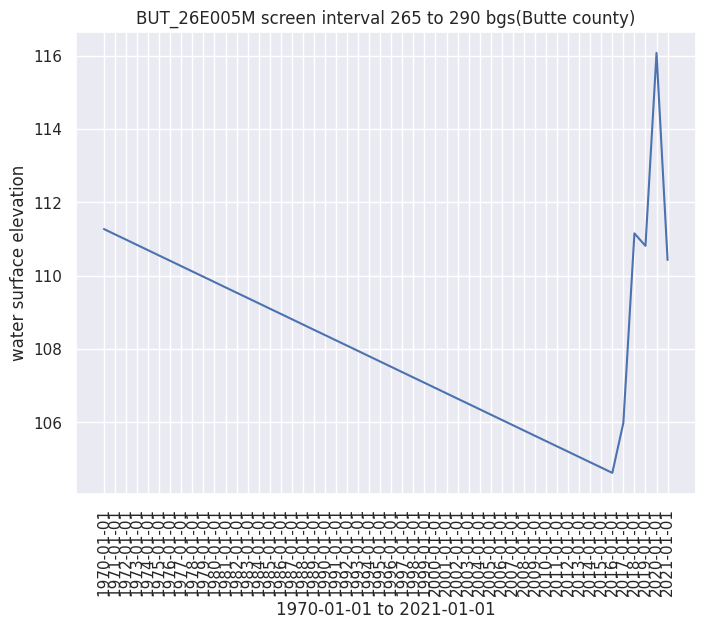

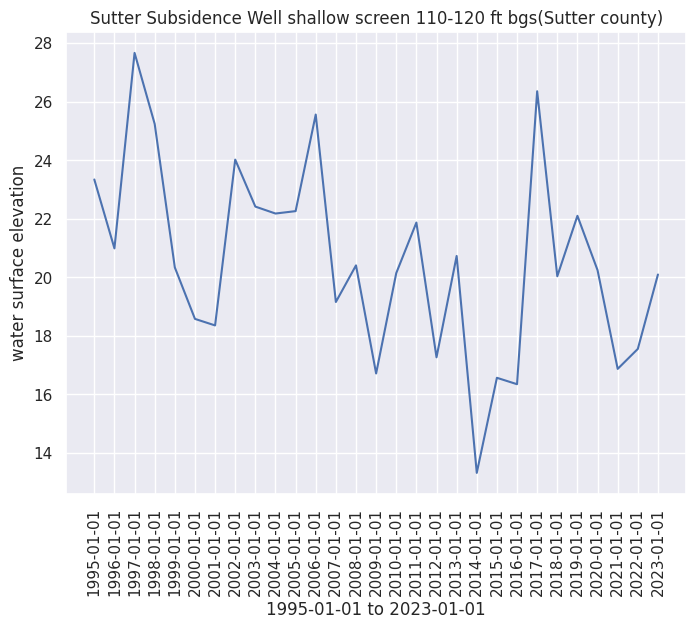

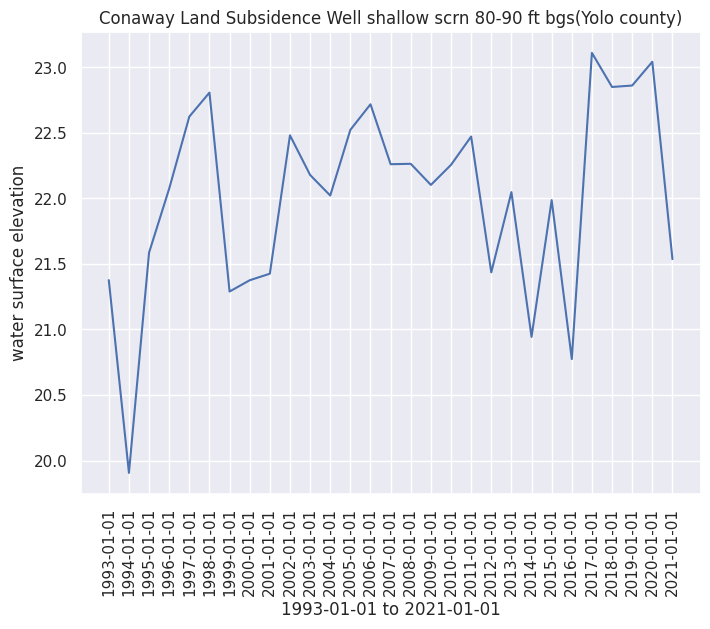

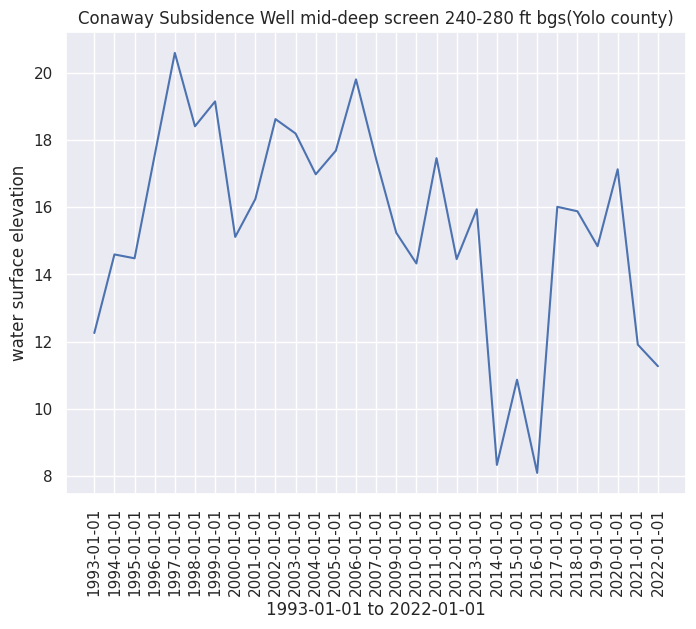

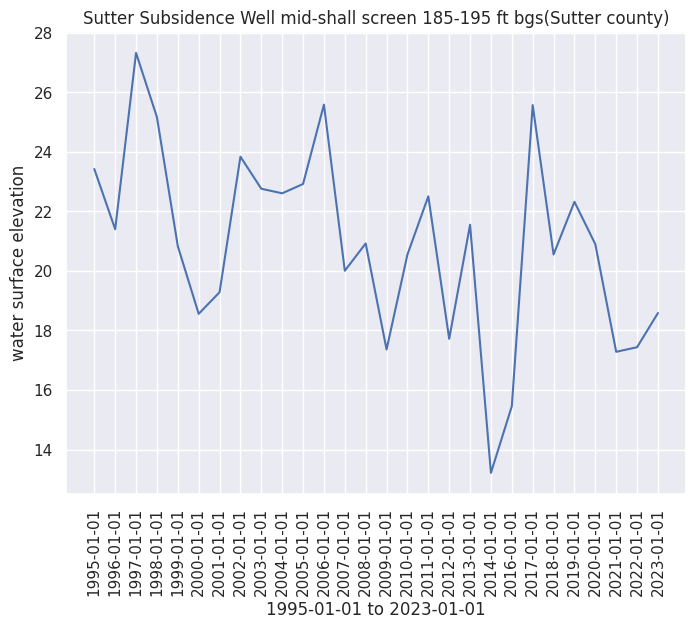

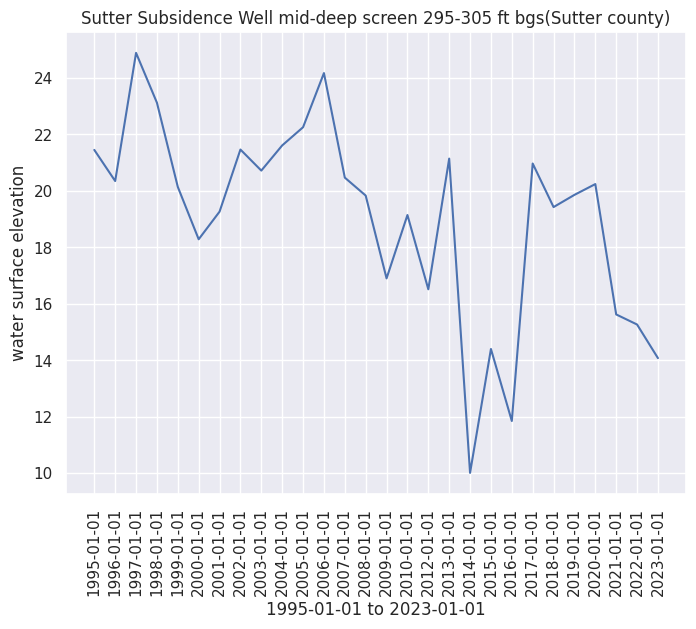

In [67]:
jan_meas = get_mst_by_month(df, '01').copy()

count = jan_meas.value_counts('STATION')
for station in count[count >= 28].index:
    st_info = stations[stations['STATION'] == station]
    stn = jan_meas[jan_meas['STATION'] == station]
    title = st_info['STNAME'].iloc[0] + '(' + st_info['COUNTY_NAME'].iloc[0] + ' county)'
    xlabel = stn['MSMT_DATE'].iloc[0] + ' to ' + stn['MSMT_DATE'].iloc[-1]
    plt.title(title)
    plt.plot(stn['MSMT_DATE'], stn['WSE'])
    plt.xticks(stn['MSMT_DATE'], rotation='vertical')
    plt.ylabel('water surface elevation')
    plt.xlabel(xlabel)
    plt.show()

## Preliminary work on machine learning to make predictions

We are going to use the `jan_meas` variable to perform the predictions

### Convert MSMT_Date to Timestamp

In [68]:
jan_meas = get_mst_by_month(df, '01').copy()

jan_meas['MSMT_TIMESTAMP'] = pd.to_datetime(jan_meas['MSMT_DATE'], format='%Y-%m-%d').astype(int)
jan_meas['STATION_IDX'] = jan_meas.apply(lambda x: stations[stations['STATION'] == x['STATION']].index[0] if len(stations[stations['STATION'] == x['STATION']].index) > 0 else None, axis=1)

In [69]:
jan_meas.describe()

,WLM_RPE,WLM_RPE_QC,WLM_GSE,WLM_GSE_QC,RPE_WSE,RPE_WSE_QC,GSE_WSE,GSE_WSE_QC,WSE,WSE_QC,MSMT_TIMESTAMP,STATION_IDX
count,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.00000,5560.000000,5560.000000,5.560000e+03,5560.000000
mean,337.260949,8.685791,335.403631,8.280396,32.601100,1.722302,30.743781,9.25018,304.659853,9.221403,1.374386e+18,266.152158
std,977.666585,24.343446,977.565067,24.052238,31.216816,7.185703,31.291370,25.00618,979.378738,25.009904,1.942721e+17,145.206354
min,-0.570000,1.000000,-3.170000,1.000000,-11.806000,1.000000,-14.606000,1.00000,-98.033000,1.000000,0.000000e+00,0.000000
25%,38.830000,1.000000,37.081000,1.000000,11.662250,1.000000,10.036250,1.00000,24.030500,1.000000,1.262304e+18,142.000000
50%,122.680000,1.000000,119.880000,1.000000,22.940500,1.000000,20.922500,1.00000,99.537000,1.000000,1.388534e+18,267.000000
75%,205.890000,1.000000,204.420000,1.000000,42.104000,1.000000,40.266000,1.00000,155.448750,1.000000,1.514765e+18,383.000000
max,5495.260000,130.000000,5492.010000,130.000000,241.365000,120.000000,238.745000,130.00000,5491.813000,130.000000,1.672531e+18,566.000000


In [70]:
# for repeatability
np.random.seed(42)   

predictors = ['MSMT_TIMESTAMP', 'STATION_IDX']
target = 'WSE'

X = jan_meas[predictors].values
y = jan_meas[target].values

# Split the data into training and test sets, and scale
scaler = StandardScaler()

# unscaled version (note that scaling is only used on predictor variables)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [71]:
X_train.shape

(3892, 2)

In [72]:
X_train[:3]

array([[1546300800000000000,                 145],
       [1293840000000000000,                 424],
       [1514764800000000000,                 495]])

In [73]:
def rmse(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())

In [74]:
reg = KNeighborsRegressor(algorithm='brute')
reg.fit(X_train, y_train)
predict = reg.predict(X_test)
RMSE = rmse(predict, y_test)
print('test RMSE, default hyperparameters: ', RMSE)

test RMSE, default hyperparameters:  1067.4543175586887


In [75]:
def get_train_test_rmse(regr, X_train, X_test, y_train, y_test):
    regr.fit(X_train, y_train)
    predict = regr.predict(X_test)
    rmse_te = rmse(predict, y_test)
    
    regr.fit(X_train, y_train)
    predict = regr.predict(X_train)
    rmse_tr = rmse(predict, y_train)
    return rmse_tr, rmse_te

In [76]:
n = 30
test_rmse = []
train_rmse = []
ks = np.arange(1, n+1, 2)
for k in ks:
    print(k, ' ', end='')
    regr = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    rmse_tr, rmse_te = get_train_test_rmse(regr, X_train, X_test, y_train, y_test)
    train_rmse.append(rmse_tr)
    test_rmse.append(rmse_te)
print('done')

1  3  5  7  9  11  13  15  17  19  21  23  25  27  29  done


In [77]:
def get_best(ks, rmse):
    min_k = 1
    min = np.array(rmse)[0]
    for idx in range(len(ks)):
        if np.array(rmse)[idx] < min:
            min_k = ks[idx]
            min = np.array(rmse)[idx]
    return min_k, min

best_k, best_rmse = get_best(ks, test_rmse)
print('best k = {}, best test RMSE: {:0.1f}'.format(best_k, best_rmse))

best k = 23, best test RMSE: 1034.2


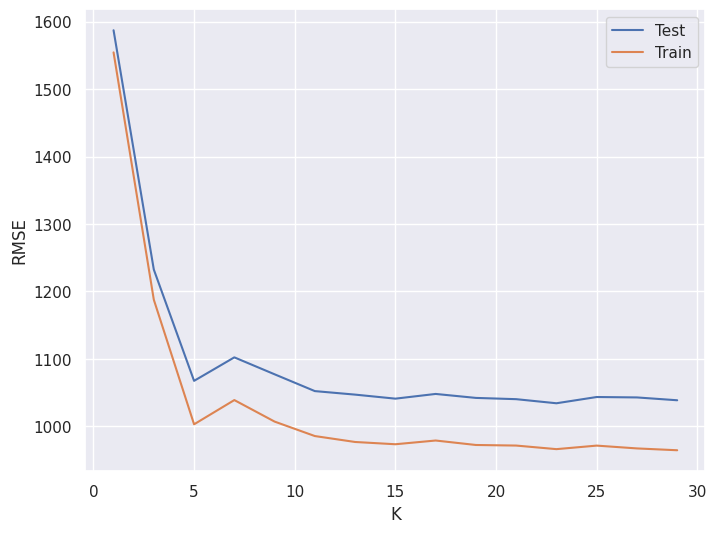

In [78]:
plt.plot(ks, test_rmse, label='Test')
plt.plot(ks, train_rmse, label='Train')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## Comments

So far the training data does not look quite right. Could be from the cyclic data or that the index/timestamp predictors do not fit this model well. It could also be because the data is somewhat erratic. 

## Testing Unscaled vs Scaled

### Unscaled knn regressor

1  3  5  7  9  11  13  15  17  19  21  23  25  27  29  done
best k = 21, best test RMSE: 77.5


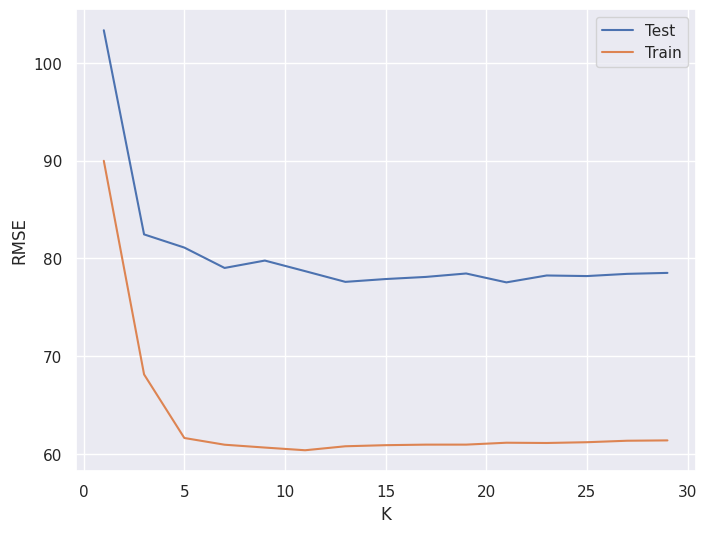

In [79]:
jan_meas = get_mst_by_month(df, '01').copy()
jan_meas = jan_meas[jan_meas['STATION'].map(jan_meas['STATION'].value_counts()) > 20]
jan_meas['MSMT_TIMESTAMP'] = pd.to_datetime(jan_meas['MSMT_DATE'], format='%Y-%m-%d').astype(int)
jan_meas['STATION_IDX'] = jan_meas.apply(lambda x: stations[stations['STATION'] == x['STATION']].index[0] if len(stations[stations['STATION'] == x['STATION']].index) > 0 else None, axis=1)

predictors = ['MSMT_TIMESTAMP', 'STATION_IDX']
target = 'WSE'

X = jan_meas[predictors].values
y = jan_meas[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

n = 30
test_rmse = []
train_rmse = []
ks = np.arange(1, n+1, 2)
for k in ks:
    print(k, ' ', end='')
    regr = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    rmse_tr, rmse_te = get_train_test_rmse(regr, X_train, X_test, y_train, y_test)
    train_rmse.append(rmse_tr)
    test_rmse.append(rmse_te)
print('done')
best_k, best_rmse = get_best(ks, test_rmse)
print('best k = {}, best test RMSE: {:0.1f}'.format(best_k, best_rmse))

plt.plot(ks, test_rmse, label='Test')
plt.plot(ks, train_rmse, label='Train')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### Scaled knn regressor

WSE_QC
1    81
dtype: int64
1  3  5  7  9  11  13  15  17  19  21  23  25  27  29  done
best k = 9, best test RMSE: 6.5


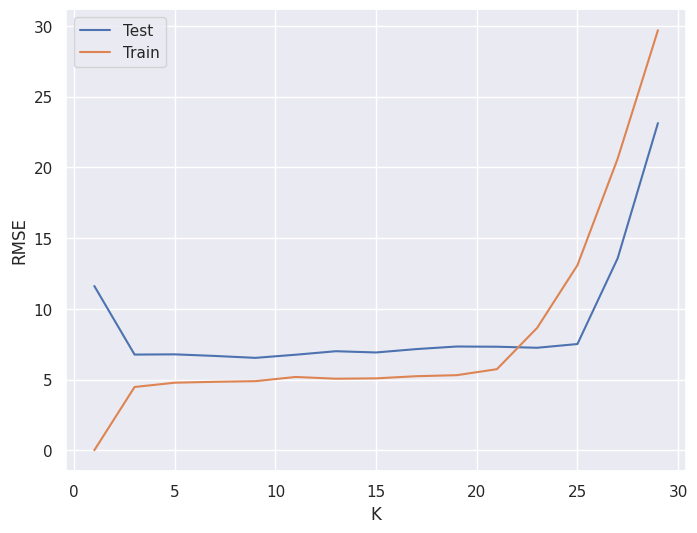

In [80]:
jan_meas = get_mst_by_month(df, '01').copy()
# jan_meas = df.copy()
jan_meas = jan_meas[jan_meas['STATION'].map(jan_meas['STATION'].value_counts()) > 20]
jan_meas = jan_meas[jan_meas['WSE_QC'] == 1]

print(jan_meas.value_counts('WSE_QC'))

jan_meas['MSMT_TIMESTAMP'] = pd.to_datetime(jan_meas['MSMT_DATE'], format='%Y-%m-%d').astype(int)
jan_meas['STATION_IDX'] = jan_meas.apply(lambda x: stations[stations['STATION'] == x['STATION']].index[0] if len(stations[stations['STATION'] == x['STATION']].index) > 0 else None, axis=1)

predictors = ['MSMT_TIMESTAMP', 'STATION_IDX']
target = 'WSE'

X = jan_meas[predictors].values
y = jan_meas[target].values

scaler = StandardScaler()

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

n = 30
test_rmse = []
train_rmse = []
ks = np.arange(1, n+1, 2)
for k in ks:
    print(k, ' ', end='')
    regr = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    rmse_tr, rmse_te = get_train_test_rmse(regr, X_train, X_test, y_train, y_test)
    train_rmse.append(rmse_tr)
    test_rmse.append(rmse_te)
print('done')
best_k, best_rmse = get_best(ks, test_rmse)
print('best k = {}, best test RMSE: {:0.1f}'.format(best_k, best_rmse))

plt.plot(ks, test_rmse, label='Test')
plt.plot(ks, train_rmse, label='Train')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.legend()
plt.show()